<a href="https://colab.research.google.com/github/oonya/image-processing/blob/master/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

unieq rgb =
 [[ 32  59  99]
 [ 58 193 227]
 [110 138 186]
 [245 246 248]] 

(sakini hsv conversion)unieq hsv=
 [[ 10   3 248]
 [ 11 104 186]
 [ 12 173  99]
 [ 24 190 227]] 

atoni hsv conversion, uniq_hsv=
 [[[ 12 173  99]
  [ 24 190 227]
  [ 11 104 186]
  [ 10   3 248]]] 

uniq_hsv conversion to rgb [[[ 32  59  99]
  [ 58 193 227]
  [110 138 186]
  [245 246 248]]] 



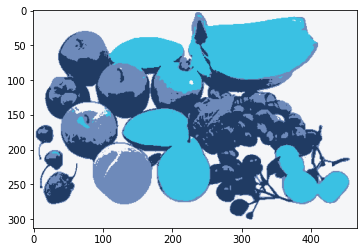

In [0]:
import numpy as np
import cv2

img = cv2.imread('fruit.jpg')

Z = img.reshape((-1, 3))

Z = np.float32(Z)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

K = 4

ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)

res = center[label.flatten()]

res2 = res.reshape((img.shape))


src = cv2.cvtColor(res2, cv2.COLOR_BGR2RGB)
src2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(res2, cv2.COLOR_BGR2HSV)

hsv_to_rgb = cv2.cvtColor(res2, cv2.COLOR_HSV2RGB)


from matplotlib import pyplot as plt

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(res2)

# red = np.uint8([[[255, 255, 255]]])
# hsv_red = cv2.cvtColor(red, cv2.COLOR_BGR2HSV)
# print(hsv_red, "\n")

# cv2.imwrite('res2.jpg', res2)


# print(hsv)
uniq_rgb = np.unique(res2.reshape((-1, 3)), axis=0)
print("unieq rgb =\n", uniq_rgb, "\n")

uniq_hsv = np.unique(hsv.reshape((-1, 3)), axis=0)
print("(sakini hsv conversion)unieq hsv=\n" ,uniq_hsv, "\n")


# uniq_hsv = np.uint8(uniq_rgb)
# uniq_hsv = cv2.cvtColor(uniq_hsv, cv2.COLOR_BGR2HSV)
# print(uniq_hsv)

uniq_hsv = np.uint8(np.array([uniq_rgb]))
uniq_hsv = cv2.cvtColor(uniq_hsv, cv2.COLOR_BGR2HSV)
print("atoni hsv conversion, uniq_hsv=\n" ,uniq_hsv, "\n")

red = np.uint8(uniq_hsv)
hsv_red = cv2.cvtColor(red, cv2.COLOR_HSV2BGR)
print("uniq_hsv conversion to rgb" ,hsv_red, "\n")

# print(res2.reshape((-1, 3)))
# print(res2[25, 25])
# print(res2[25, 25][1])
# print(res2[25, 25][0])

#b g r

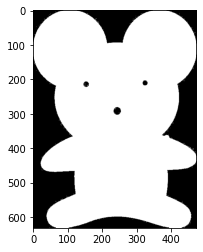

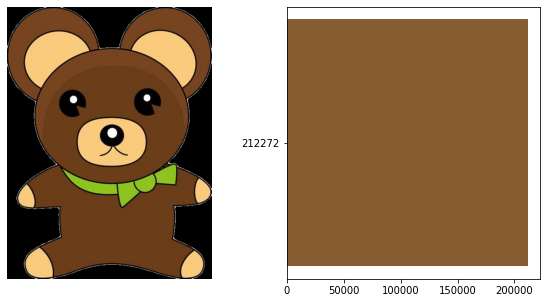

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# 画像を読み込む。
img = cv2.imread("bear.jpg")

# gray に変換する。
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 水色かどうかで2値化する。(水色は0、それ以外は255)
binary = cv2.inRange(gray,240, 255)
binary = ~binary

plt.gray()
plt.imshow(binary)

# メディアンフィルタで端をなめらかにする。
binary = cv2.medianBlur(binary, 7)

# 輪郭抽出を実行する。
contours, hierarchy = cv2.findContours(
    binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

for cnt in contours:
    # ROI 領域以外をマスクする。
    mask = np.zeros_like(img)
    cv2.drawContours(mask, [cnt], -1, color=(255, 255, 255), thickness=-1)
    masked = img & mask

    # 色一覧
    colors = masked.reshape(-1, 3)
    colors = colors[(colors != 0).all(axis=1)]  # 黒は除く

    # k平均法でクラスタリングする。
    k = 1
    criteria = cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0
    ret, label, center = cv2.kmeans(
        colors.astype(np.float32), k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS
    )

    # 円の中に含まれる代表色 Top3 を可視化する。
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
    # 各クラスに属するサンプル数を計算する。
    height = [np.count_nonzero(label == i) for i in range(k)]
    # 各クラスたの色を取得する。matplotlib の引数の仕様上、[0, 1] にして、(R, G, B) の順番にする。
    rep_color = (center / 255)[:, ::-1]

    # 画像を表示する。
    ax1.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))
    ax1.set_axis_off()

    # ヒストグラムを表示する。
    ax2.barh(np.arange(k), height, color=rep_color, tick_label=height)
    plt.show()

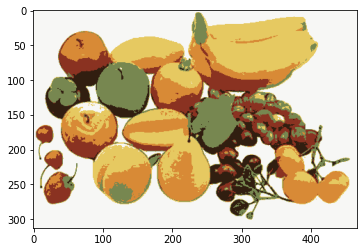

In [0]:
# note

import cv2
import numpy as np
import matplotlib.pyplot as plt


# 画像を読み込む。
src = cv2.imread("fruit.jpg")
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

img = src.reshape((-1, 3))
img = np.float32(img)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

K = 15

ret, label, center = cv2.kmeans(img, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]

# res2 = res.reshape(src.shape)

# plt.imshow(res2)

res = np.float32(res)
ret, label, center = cv2.kmeans(res, 6, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]

res2 = res.reshape(src.shape)
plt.imshow(res2)



In [0]:
from google.colab import files
uploaded_file = files.upload()

# !ls

Saving fruit.jpg to fruit.jpg


In [0]:
ary = [[[ 12, 112,  82],[14, 77, 163], [34, 108, 222], [24, 14, 250]]]

for idx in ary[0]:
  h = idx[0]

  if h <= 30:
    print("red")
  elif h <= 60:
    print("yellow")
  elif h <= 106:
    print("green")
  elif h <= 163:
    print("blue")
  else:
    print("red")



colors_hsv =[[
          [0, 0, 100],# white
          [60, 100, 100],# yellow
          [128, 100, 100],# green
          [38, 100, 100],#orange
          [0, 100, 50],#brown
          [300, 100, 100],#parple
          [240, 100, 100],#blue
          [0, 100, 100],#red
]]

red
red
yellow
red


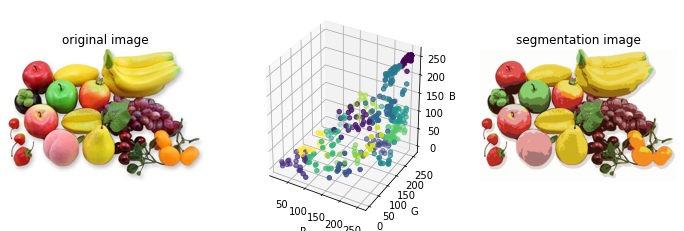

In [0]:
# aoym
#! /usr/bin/python
# -*- coding: utf-8 -*-

import cv2
import numpy as np
import matplotlib.figure 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.special
import scipy.fftpack
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

## 原画像の読み込み
img = cv2.imread('fruit.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 元画像の表示
#aspect_ratio = float(img.shape[0]) / img.shape[1]
#fig = plt.figure(figsize = (3*aspect_ratio,1))
aspect_ratio = matplotlib.figure.figaspect(1)
aspect_ratio[0]=aspect_ratio[0]*3
fig = plt.figure(figsize=aspect_ratio)

plt.subplot(1,3,1)
plt.imshow(img)
plt.title('original image')
plt.axis('off')


data = np.reshape(img, (img.shape[0]*img.shape[1], img.shape[2])) # クラスタリングのために2次元に直す
n_clusters=16 # クラスタ数(何色に減色するか)
# クラスタリング(K-means)
model = KMeans(n_clusters=n_clusters, random_state=10).fit(data)
labels = model.labels_

# クラスタリング(GMM+EM)
# covariance_type='full' 
# estimator = GaussianMixture(n_components=n_clusters, random_state=10, covariance_type='tied') 
# estimator.fit(data)
# labels = estimator.predict(data) 

# クラスタリング結果の可視化(RGB空間上，マーカー色は画像のものとは異なりただの順番)
rndind = np.random.randint(0, len(data), 500)
ax = fig.add_subplot(132, projection='3d')
ax.set_xlabel("R")
ax.set_ylabel("G")
ax.set_zlabel("B")
ax.scatter3D(data[rndind,0], data[rndind,1], data[rndind,2], c=labels[rndind])

# クラスタの平均を画素値にする
for l in range(0,n_clusters):
    mean = np.mean(data[labels==l,:], axis=0)
    data[labels==l,:]=mean

# 結果の描画
img2 = np.reshape(data, img.shape) # 画像の形(width,height,channel)に戻す

plt.subplot(1,3,3)
plt.imshow(img2)
plt.title('segmentation image')
plt.axis('off')



plt.show()
